<a href="https://colab.research.google.com/github/MrityunjaySingh18/Health_Insurance_Cross_Sell_Prediction/blob/main/Mrityunjay_Singh_Chandel_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

###**HEALTH INSURANCE DATASET**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
#Importing the libraries 

#Basic libraries
import pandas as pd
import numpy as np

#Plotation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

#Hyperparameter Tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier  

In [ ]:
#mounting the drive for importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/Capstone Project - Health Insurance Cross Sell Prediction/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

Now we'll get started with the Data Wrangling process where we'll clean and unify the messy and complex data set for analysis.

let's get started...

#Data Exploration 

In [ ]:
data_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [ ]:
data_df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#Checking Duplicate values if any...
data_df[data_df.duplicated()]

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []

In [ ]:
#checking for null values if any...
data_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

So we can clearly get the notion about out dataset.


1. No Duplicated Values are observed.
2. NO NUll Values are observed.
3. Here we have 4 numeric and 5 independent features.
4. Response is our dependent categorical column.



##**Data Cleaning and Restructuring**

###Let's give it a look for Outliers...

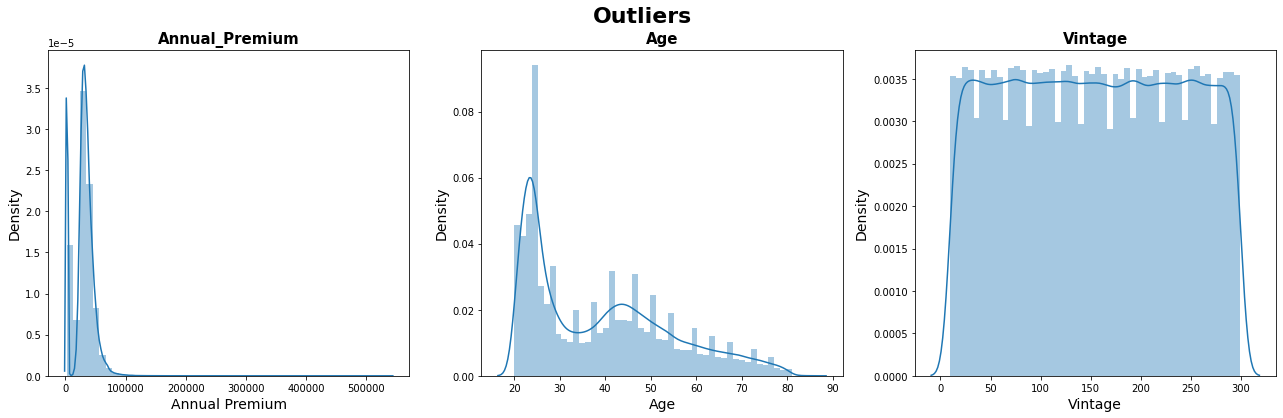

In [ ]:
def show_outliers(df):

    fig, axes = plt.subplots(1, 3, figsize=(22,6), squeeze=False)

    sns.distplot(ax = axes[0][0],x = df['Annual_Premium'])
    axes[0][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[0][1],x = df['Age'])
    axes[0][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[0][2],x = df['Vintage'])
    axes[0][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(data_df)






The above plotation states that-
*   Annual Premium has a positively skewed distribution.
*   Age columns has some outliers but they won't affect our result so we won't be treating those outliers.
*   Vintage column has approximate Uniform Distribution



###**Treating the Outliers and Feature Scalling**

*  Quantile Approach would be feasible for outlier treatment here.
*  For Normalization we will be using MinMaxScaler Technique.

In [ ]:
#IQR Approach for Outliers treatment
def treat_outliers(df):
  Q1 = df['Annual_Premium'].quantile(0.25)
  Q3 = df['Annual_Premium'].quantile(0.75)
  IQR=Q3-Q1

  lwr_bound = Q1-1.5*IQR
  upr_bound = Q3+1.5*IQR
  df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>upr_bound, upr_bound, df['Annual_Premium'])

In [ ]:
#MinMaxScaler
def scale_feat(df):
  scaler=MinMaxScaler()

  df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
  df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

In [ ]:
treat_outliers(data_df)
scale_feat(data_df)

Let's check the treated column....

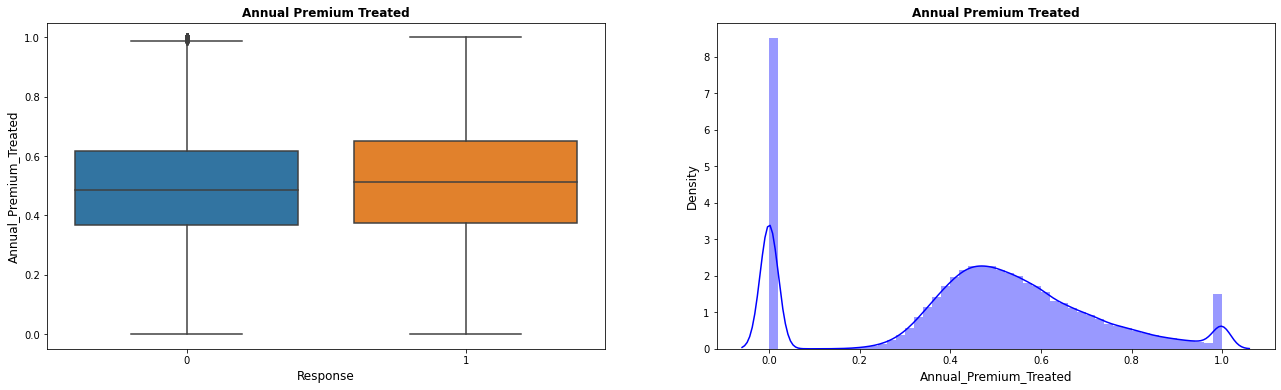

In [ ]:
#to visualize annual premium treated column if there are still any outliers...
def show_annual_outliers(df):
  fig,axes = plt.subplots(1,2, figsize=(22,6))
  sns.boxplot(ax=axes[0], y = 'Annual_Premium_Treated', x = 'Response', data = df)
  axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 12})
  axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 12})
  axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 12,  'fontweight' :'bold'})

  sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='blue')
  axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 12})
  axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 12})
  axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 12,  'fontweight' :'bold'})

show_annual_outliers(data_df)



*   As We can see that there are no more ***outliers*** left in the column Annual Premium.


#**Exploratory Data Analysis**



###**Numerical Distribution**

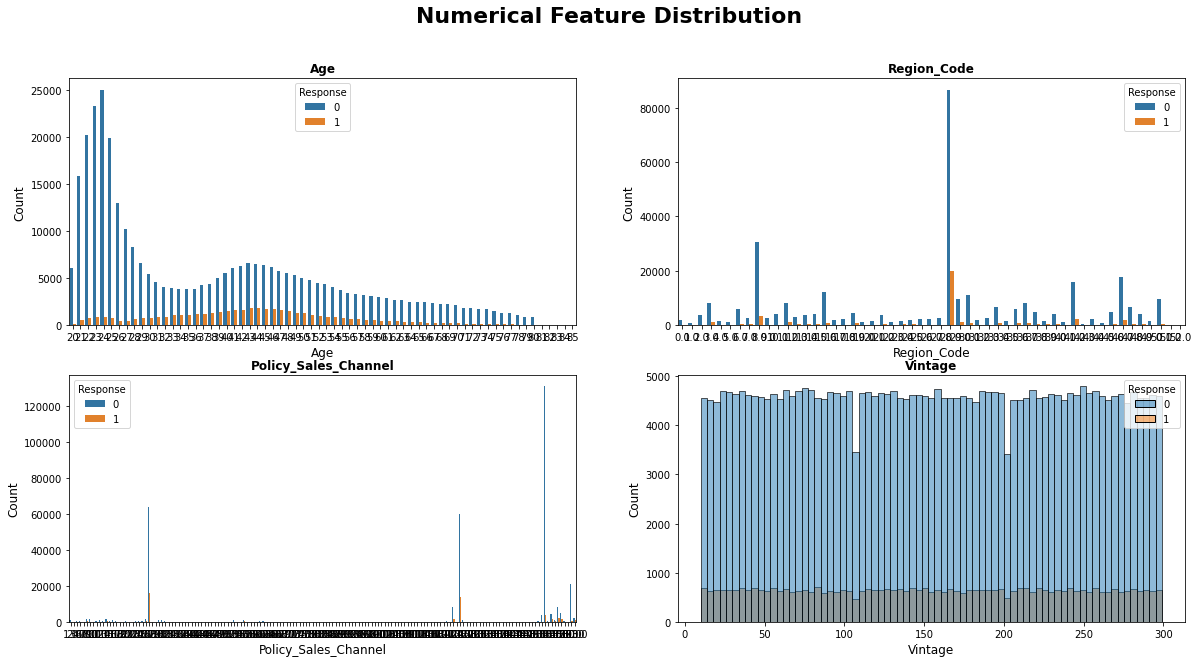

In [ ]:
#Creating a Function to check the Numerical Feature Distribution
def numerical_features_dist(df):
  fig,axes = plt.subplots(2,2, figsize = (20,10))

  #Age vs Count
  sns.countplot(ax=axes[0][0], x= 'Age', data=df, hue='Response')
  axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 12})
  axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 12})
  axes[0][0].set_title('Age', fontdict={'fontsize': 12, 'fontweight':'bold'})

  #Region_code vs Count
  sns.countplot(ax=axes[0][1], x= 'Region_Code', data=df, hue='Response')
  axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 12})
  axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 12})
  axes[0][1].set_title('Region_Code', fontdict={'fontsize': 12, 'fontweight':'bold'})

  #Policy_Sales_Channel vs Count
  sns.countplot(ax=axes[1][0], x= 'Policy_Sales_Channel', data=df, hue='Response')
  axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 12})
  axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 12})
  axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 12, 'fontweight':'bold'})

  #Vintage vs Count
  sns.histplot(ax=axes[1][1], x='Vintage', data=df, hue='Response')
  axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 12})
  axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 12})
  axes[1][1].set_title('Vintage', fontdict={'fontsize': 12, 'fontweight':'bold'})    

  #title
  plt.suptitle('Numerical Feature Distribution', fontsize = 22, fontweight = 'bold')

numerical_features_dist(data_df)

##**Age Distribution, Region Distribution and Policy Sales Channel Distribution**

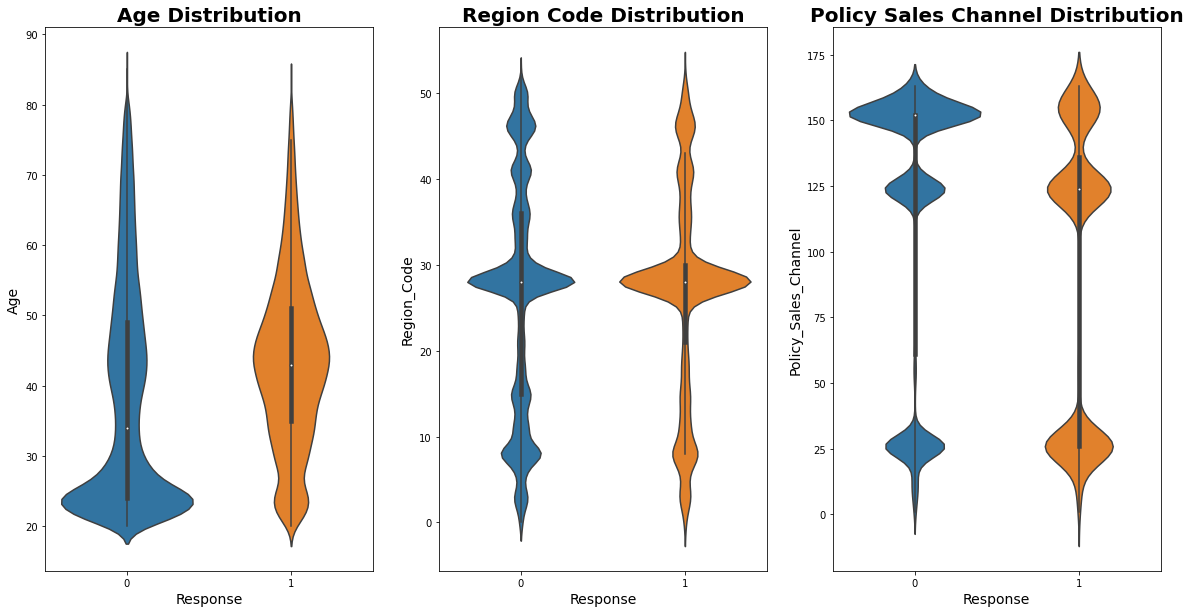

In [ ]:
def age_distribution(df):
  fig,axes = plt.subplots(1,3, figsize = (20,10))
  sns.violinplot(ax = axes[0],y = 'Age', data = df, x='Response')
  axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
  axes[0].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
  axes[0].set_title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

  sns.violinplot(ax = axes[1],y = 'Region_Code', data = df, x='Response')
  axes[1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
  axes[1].set_ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
  axes[1].set_title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

  sns.violinplot(ax = axes[2],y = 'Policy_Sales_Channel', data = df, x='Response')
  axes[2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
  axes[2].set_ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
  axes[2].set_title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})


age_distribution(data_df)

* As we get the notion about the data in Age feature there's a huge dispersion, 

* So in order to gain better insights we need to convert the age column into categorical as "young_age", "middle_age" and "old_age"

* Similarly, we can also categorize Policy_Sales_channel, Region Code.

In [ ]:
#Creating a function to convert numerical into categorical 
def convert_num_to_cat(df):
  #Age Feature
  df['Age_Group'] = df['Age'].apply(lambda x: 'young_age' if x>=20 and x<=45 else 'middle_age' if x>=45 and x<=65 else 'old_age')

  #Policy_Sales_channel feature
  x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D') 
  res = dict(zip(x.keys(),x.values))
  df['Policy_Sales_Channel_Cat']=df['Policy_Sales_Channel'].map(res)


  #Region_Code Feature
  x = df['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
  res = dict(zip(x.keys(),x.values))
  df['Region_Code_cat'] = df['Region_Code'].map(res) 

convert_num_to_cat(data_df)

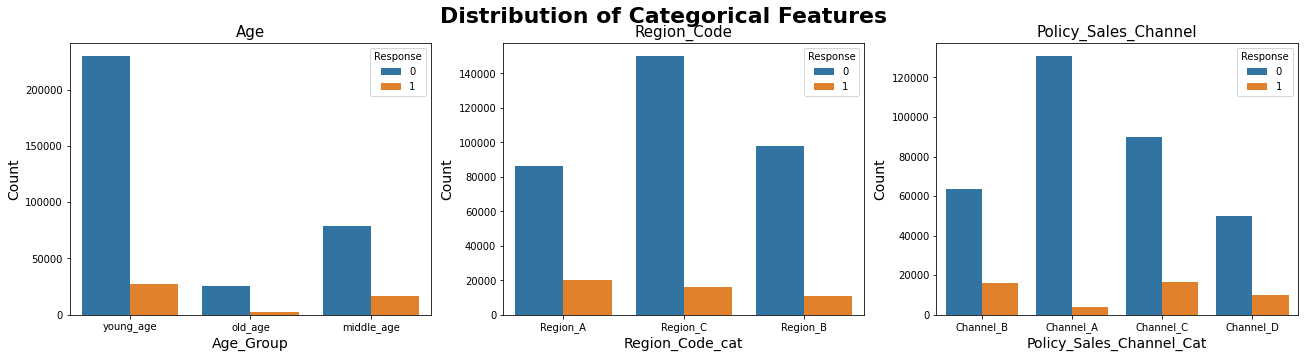

In [ ]:
#Visualizing the categorical distribution
def show_convert_num_to_cat(df):    
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_cat', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_cat', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Cat', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Cat', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )

show_convert_num_to_cat(data_df)

Inference:
* Customer age of Young Group are more likely not interested in opting vehicle assurance.
* Similarly, Region C and Channel A are likely not interested in taking the vehicle insurance.


In [ ]:
data_df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  Annual_Premium_Treated  Vintage_Treated   Age_Group  \
0         1                0.638245         0.716263   young_age   
1         0                0.521510         0.598616     old_age   
2         1                0.601797         0.058824  middle_age   
3         0                0.438540         0.667820   young_age   
4         0                0.419591         0.100346   young_age   

  Policy_Sales_Channel_Cat Region_Code_cat  
0                Channel_B        Region_A  
1                Channel_B        Region_C  
2                Channel_B        Region_A  
3                Channel_A        Region_C  
4                Channel_A        Region_B

##**Gender Distribution**

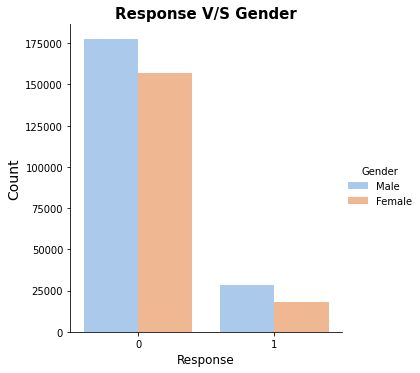

In [ ]:
def gender_dist(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})

gender_dist(data_df)

##Exploring the Age Feature

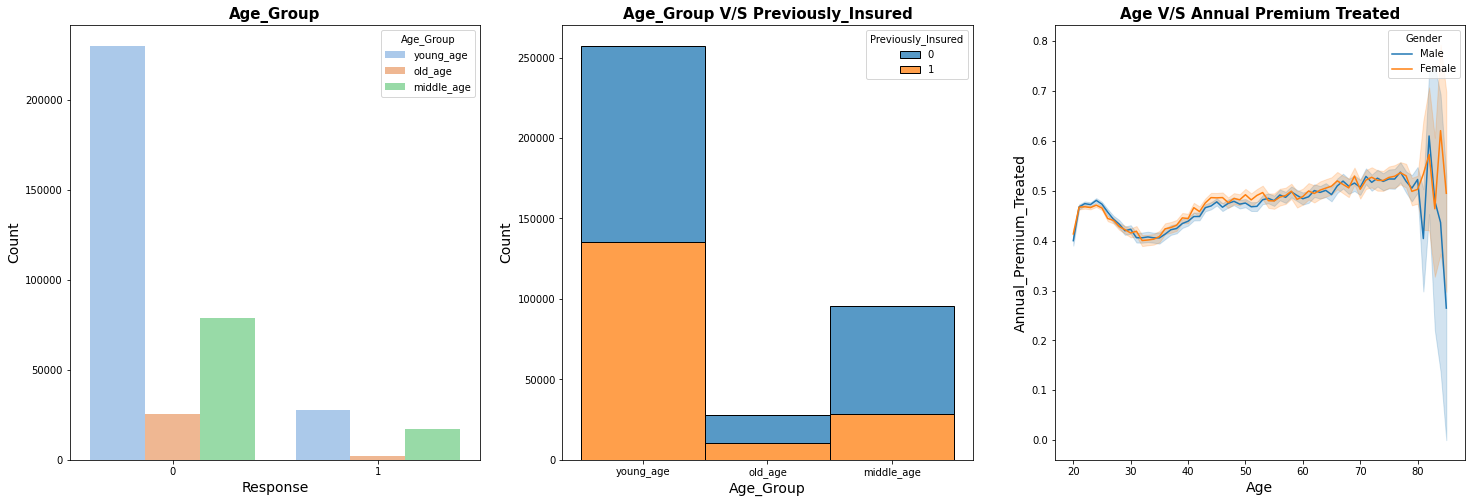

In [ ]:
def age_feat(df):
  fig, axes = plt.subplots(1,3, figsize=(25,8))
  #Countplot of Response vs Count
  sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",data=df)
  axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
  axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

  #histplot of Response vs Count
  sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group",hue="Previously_Insured", data=df, stat="count", multiple="stack")
  axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
  axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})
      
  sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",data=df,hue="Gender")
  axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
  axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
  axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})
age_feat(data_df)

Inference Gained:
* First Plot signifies different age group responded differently.
* Second Plot gives us the notion about number of customers in different age group having / not having vehicle insurance.
* Customers of Young age and Oldage are equaly interested to have or not to have the vehical insurance, meanwhile customers of middle age have the highest chances of not having previously insured vehicle insurance.
* Third plot signifies the relation between Age and the Annual Premium for both Male and Female customers.

### Time to Explore the Vehicle Damage Distribution


In [ ]:
#creating a function to plot Vehicle Damage vs Response
def vehicle_damage_dist(df):
  fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution' )
  fig.show()

In [ ]:
def show_damage_rel(df):
  """
  Here we will subplot 2 pointplot graphs to get a better understanding for Vehicle Damages and it's relationships
  
  """
  fig, axes = plt.subplots(1,2, figsize=(22,8))
  sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age", aspect=.7,kind="point", data=df)
  axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 12})
  axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 12})
  axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 14, 'fontweight':'bold'})
    
  sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df, kind = 'point')
  axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 12})
  axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 12})
  axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 14, 'fontweight':'bold'})

###Vehicle age Relation

In [ ]:
#Function to show vehicle vs age relation
def show_vehicle_age_relation(df):
  """Plotation of barplot, point plot, box plot and strippplot in a subplot to get a precise relation of vehicle age """
  fig, axes = plt.subplots(2,3, figsize=(22,15))

  sns.barplot(ax = axes[0][0], x = 'Vehicle_Age', y='Response', data = df)
  axes[0][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 12})
  axes[0][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 12})
  axes[0][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 14, 'fontweight':'bold'})

  sns.pointplot(ax = axes[0][1], y = 'Response', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df)
  axes[0][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 12})
  axes[0][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 12})
  axes[0][1].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 14, 'fontweight':'bold'})

  sns.pointplot(ax = axes[0][2], y = 'Response', x = 'Vehicle_Age', hue = 'Region_Code_cat', data=df)
  axes[0][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 12})
  axes[0][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 12})
  axes[0][2].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 14, 'fontweight':'bold'})

  sns.pointplot(ax = axes[1][0], y = 'Response', x = 'Vehicle_Age', hue = 'Policy_Sales_Channel_Cat', data=df )
  axes[1][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 12})
  axes[1][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 12})
  axes[1][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 14, 'fontweight':'bold'})

  sns.boxplot(ax = axes[1][1], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
  axes[1][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 12})
  axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 12})
  axes[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 14, 'fontweight':'bold'})

  sns.stripplot(ax = axes[1][2], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
  axes[1][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 12})
  axes[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 12})
  axes[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 14, 'fontweight':'bold'})
    

In [ ]:
def vehicle_age_dist(df):
  """Vehicle age vs Count"""
  plt.figure(figsize=(10, 8))
  sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
  plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
  plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
  plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})

### Visualization and Insights

In [ ]:
vehicle_damage_dist(data_df)

Pie Plot signifies that 97.9% of customers with vehicle damaged or not have took the insurance.

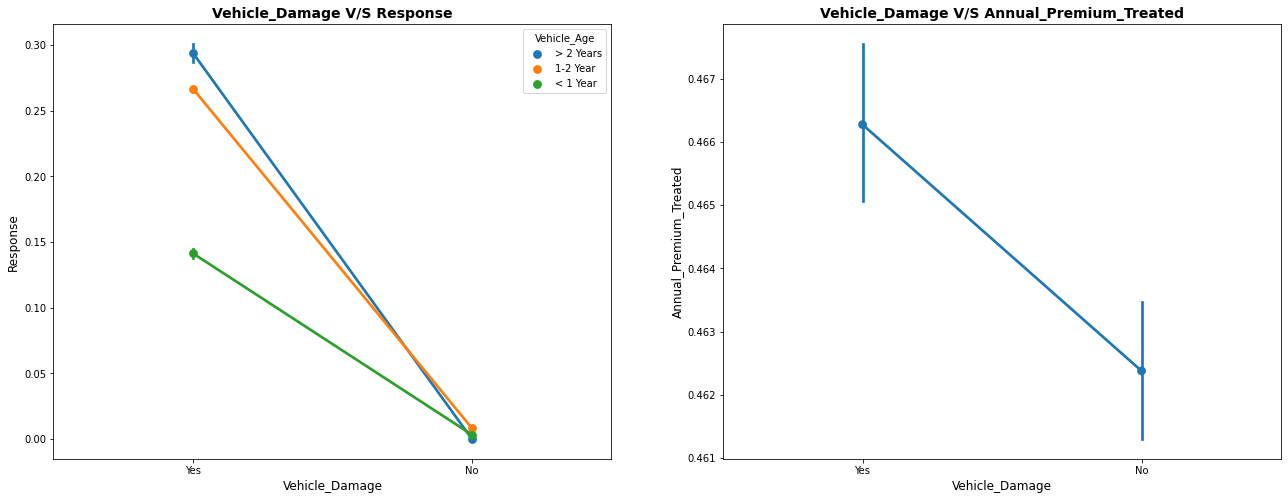

In [ ]:
show_damage_rel(data_df)

* First point plot notifies that there are chances of taking vehicle insurance higher if the vehicle is damages, With the increase in the vehicle age, chances of vehicle insurance also increases

* Second Point Plot tells us that for customers with damaged vehicle Annual Premium is comparetively higher

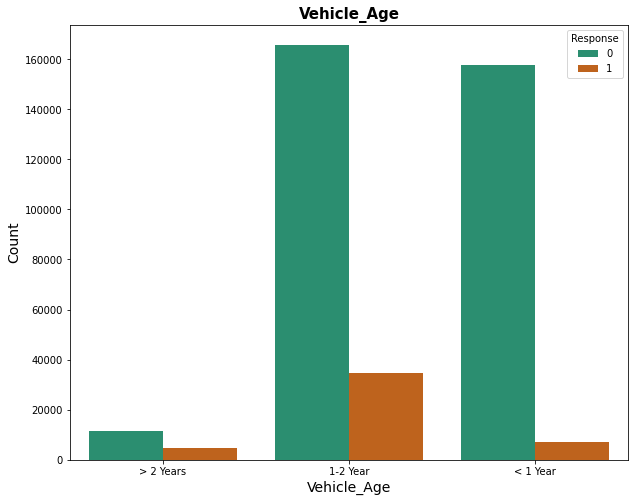

In [ ]:
vehicle_age_dist(data_df)

* We can see the number of customers of VehicleAge group, did took/didn't take 
the vehicle insurance.

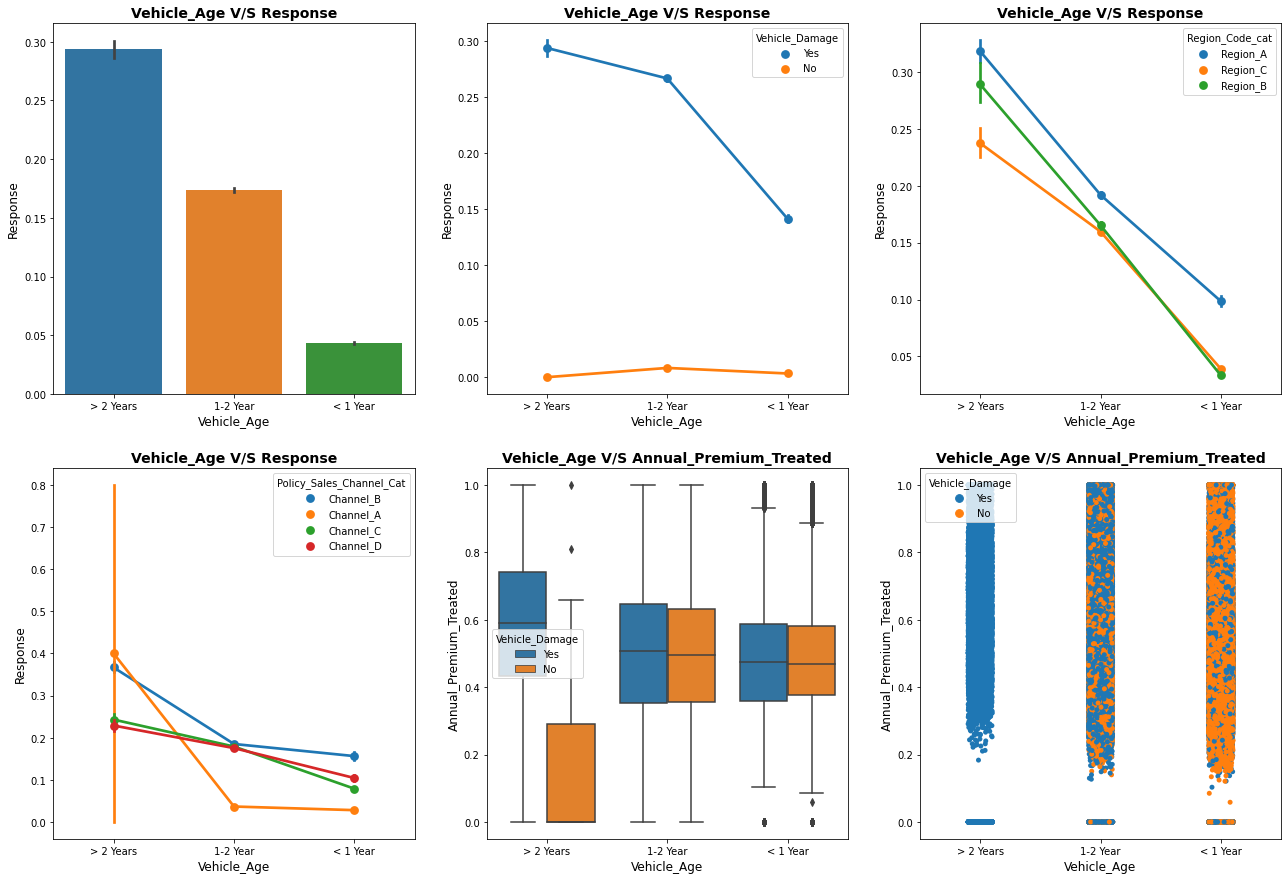

In [ ]:
show_vehicle_age_relation(data_df)

Ok in this Grid:
*  First plot signifies the possibility of taking vehicle insurance of respective VehicleAge group
* Third Plot signifies  vehicle insurance belonging to a respective vehicle age group based on their region code
* We can see the relation of Vehicle_Age group and Annual_Premium based on their Vehicle_Damage response.
* Strip plot shows that vehicle age >2 years have the higher chances of taking vehicle insurances 

###Annual Premium Relation


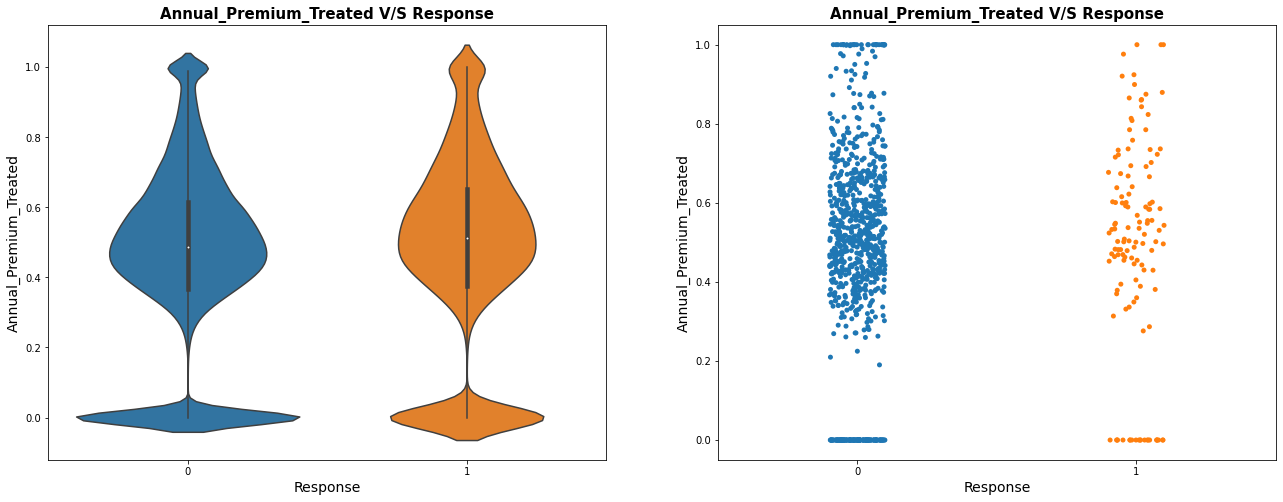

In [ ]:
def annual_premium_rel(df):
    fig, axes = plt.subplots(1,2, figsize=(22,8))

    sns.violinplot(ax = axes[0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1], x = 'Response', y = 'Annual_Premium_Treated', data = df[:1000])
    axes[1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})
annual_premium_rel(data_df)

Insights: 
* We can see that Annual Premium is more than likely to have a vehicle insurance

#Ok now it's turn to distribute Count Vs Features


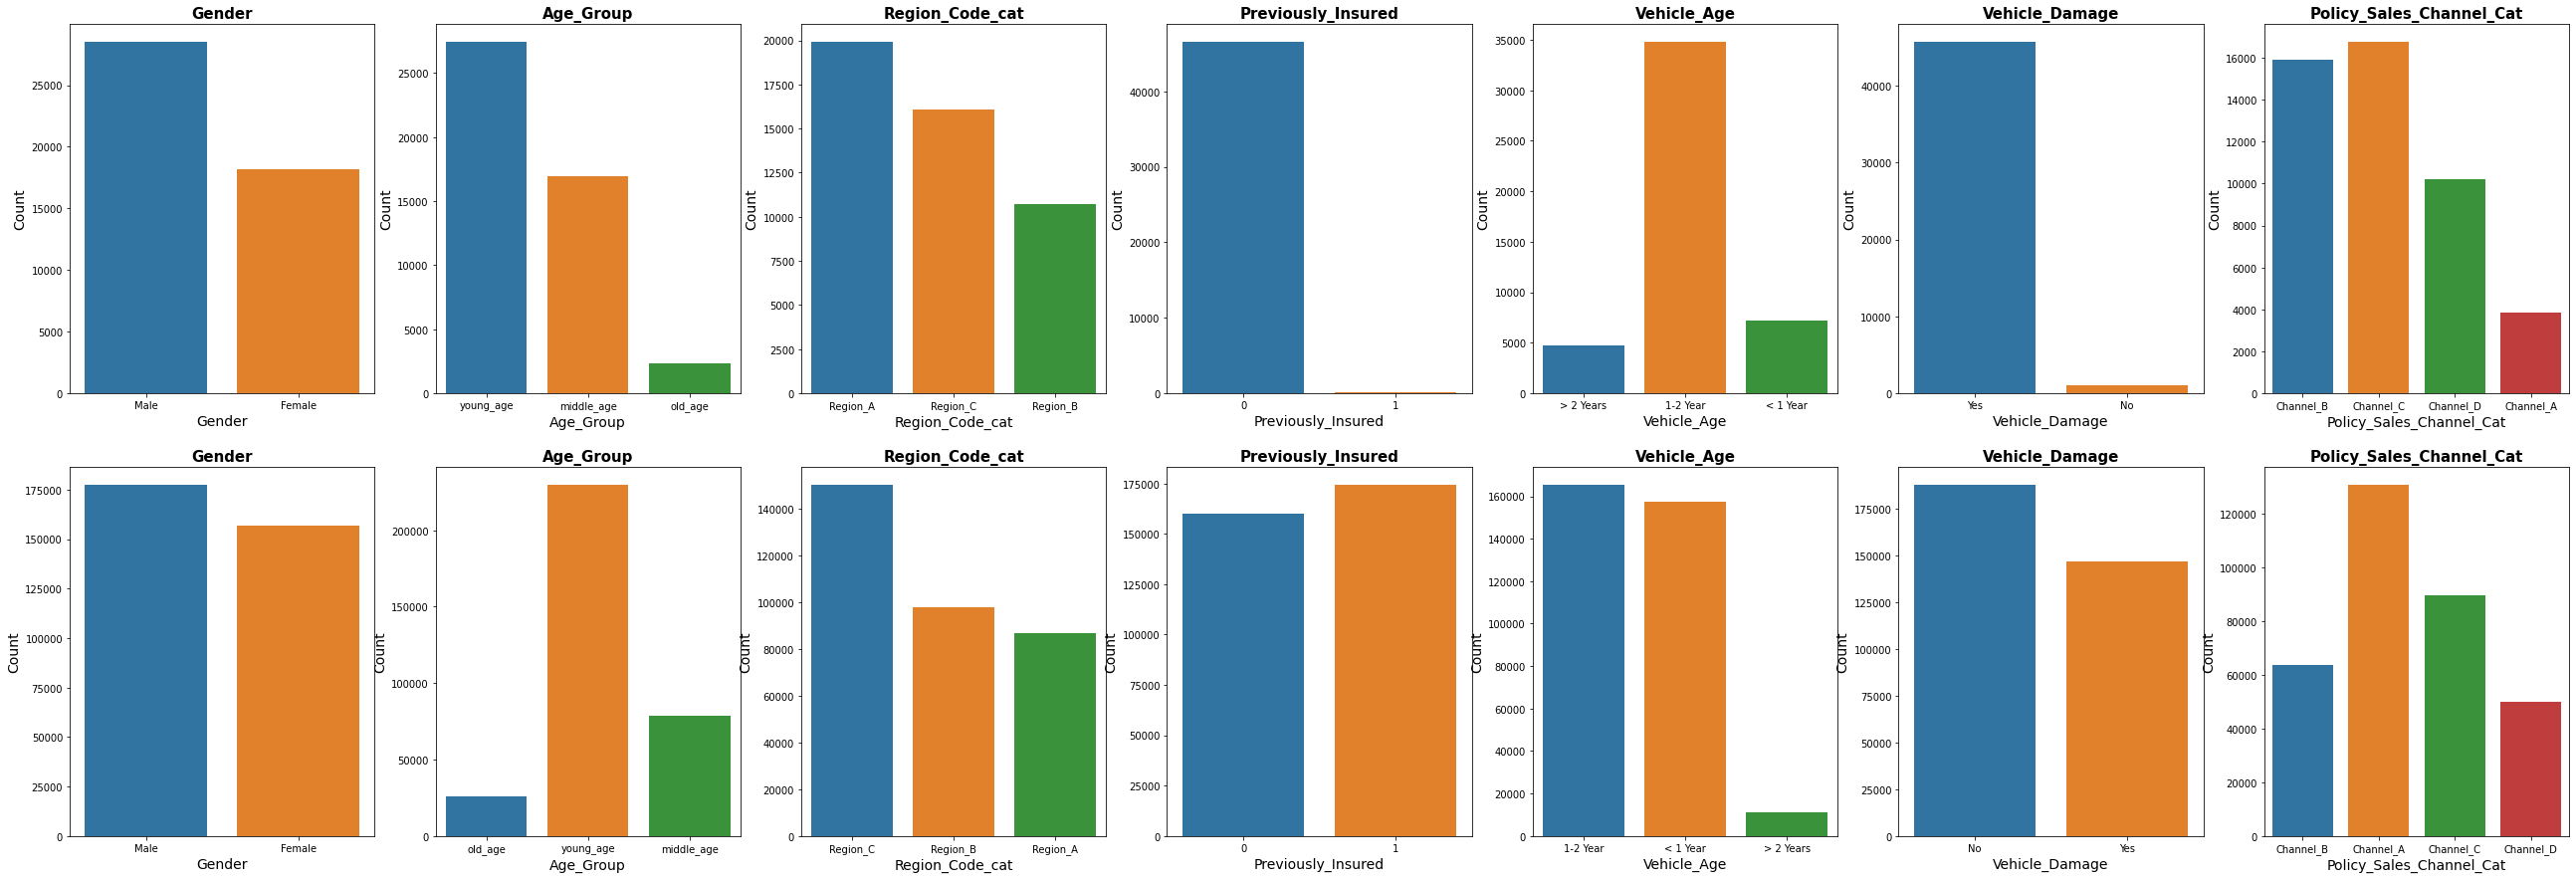

In [ ]:
def count_cat_feat(df):
    categorical_columns = ['Gender', 'Age_Group', 'Region_Code_cat', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel_Cat']

    fig, axes =  plt.subplots(2, 7, figsize=(45, 15))
    for i in range(7):
        sns.countplot(data = df[df['Response']==1], x=categorical_columns[i], ax=axes[0][i])
        axes[0][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[0][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[0][i].set_title(categorical_columns[i], 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

        sns.countplot(data = df[df['Response']==0], x=categorical_columns[i], ax=axes[1][i])

        axes[1][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[1][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[1][i].set_title(categorical_columns[i], 
                         fontdict={'fontsize': 15, 'fontweight':'bold'})
        
count_cat_feat(data_df)

* We can now drop these features  'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage' as we already categorized them.

* Also droping 'ID' and 'Driving_License' as they are not providing any valuable information.

In [ ]:
data_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_Group', 'Policy_Sales_Channel_Cat',
       'Region_Code_cat'],
      dtype='object')

In [ ]:
drop_columns = ['id', 'Age', 'Driving_License', 'Region_Code', 'Annual_Premium','Policy_Sales_Channel', 'Vintage']
data_df.drop(columns = drop_columns, inplace = True)

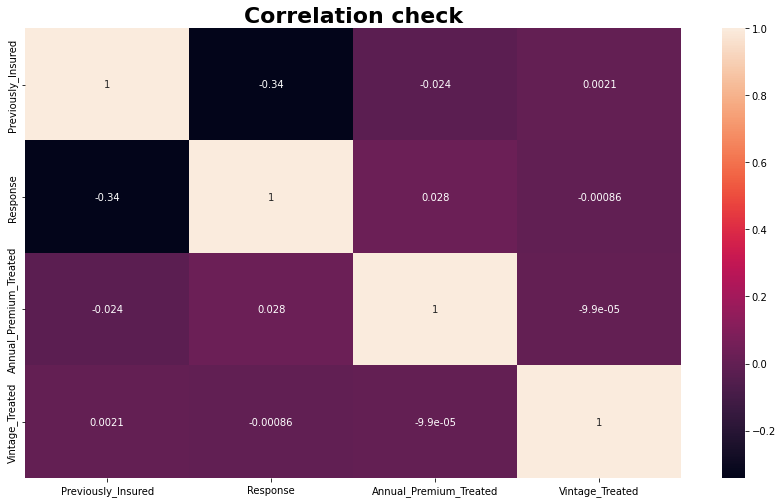

In [ ]:
#Checking the coorelation of the data using Kendall method.
def feature_selection(df):
    plt.rcParams['figure.figsize'] = 14.7,8.27
    features = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response', 'Annual_Premium_Treated', 'Vintage_Treated', 'Age_Group',
       'Policy_Sales_Channel_Cat', 'Region_Code_cat' ]

    sns.heatmap(df[features].corr(method = 'kendall'),
                cmap="rocket",annot=True)
    plt.title('Correlation check', fontdict={'fontsize':22,'fontweight':'bold'})
    
feature_selection(data_df)

As we See there's no correlation between Annual_Premium_Treated and Vintage_Treated , we can move forward with them.

# Categorical Features

In [ ]:
categorical_feat = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']

Let's See Feature Importance of categorical features.

In [ ]:
def convert_feat_to_num(df):
  global numeric_df
  numeric_df = df.copy()  
  numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x:1 if x == 'Male' else 0)
  numeric_df['Age_Group'] = numeric_df['Age_Group'].apply(lambda x:1 if x == 'young_age' else 2 if x == 'middle_age' else 3)
  numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == 'New' else 2 if x == 'Latest' else 3) 
  numeric_df['Policy_Sales_Channel_Cat'] = numeric_df['Policy_Sales_Channel_Cat'].apply(lambda x: 1 if x == 'A' else 2 if x == 'B' else 3 if x=='C' else 4)
  numeric_df['Regional_Code_cat'] = numeric_df['Region_Code_cat'].apply(lambda x : 1 if x == 'A' else 2 if x=='B' else 3 )

convert_feat_to_num(data_df)

#One Hot Encoding

> This is a process where categorical variables are converted  into a form that they could do better predictions when provided to Machine Learning ALgorithms.

> One hot Encoding comes in the picture when there is not a ordinal relationship between variables.



In [ ]:
data_df.columns 

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Response', 'Annual_Premium_Treated', 'Vintage_Treated', 'Age_Group',
       'Policy_Sales_Channel_Cat', 'Region_Code_cat'],
      dtype='object')

In [ ]:
#Columns to encode
encode_columns = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Cat', 'Region_Code_cat']
data_df = pd.get_dummies(data= data_df, columns = encode_columns)

In [ ]:
data_df.head()

Response  Annual_Premium_Treated  Vintage_Treated  Gender_Female  \
0         1                0.638245         0.716263              0   
1         0                0.521510         0.598616              0   
2         1                0.601797         0.058824              0   
3         0                0.438540         0.667820              0   
4         0                0.419591         0.100346              1   

   Gender_Male  Previously_Insured_0  Previously_Insured_1  \
0            1                     1                     0   
1            1                     1                     0   
2            1                     1                     0   
3            1                     0                     1   
4            0                     0                     1   

   Vehicle_Age_1-2 Year  Vehicle_Age_< 1 Year  Vehicle_Age_> 2 Years  ...  \
0                     0                     0                      1  ...   
1                     1                     0                      0  ...   
2                     0                     0                      1  ...   
3                     0                     1                      0  ...   
4                     0                     1                      0  ...   

   Age_Group_middle_age  Age_Group_old_age  Age_Group_young_age  \
0                     0                  0                    1   
1                     0                  1                    0   
2                     1                  0                    0   
3                     0                  0                    1   
4                     0                  0                    1   

   Policy_Sales_Channel_Cat_Channel_A  Policy_Sales_Channel_Cat_Channel_B  \
0                                   0                                   1   
1                                   0                                   1   
2                                   0                                   1   
3                                   1                                   0   
4                                   1                                   0   

   Policy_Sales_Channel_Cat_Channel_C  Policy_Sales_Channel_Cat_Channel_D  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   Region_Code_cat_Region_A  Region_Code_cat_Region_B  \
0                         1                         0   
1                         0                         0   
2                         1                         0   
3                         0                         0   
4                         0                         1   

   Region_Code_cat_Region_C  
0                         0  
1                         1  
2                         0  
3                         1  
4                         0  

[5 rows x 22 columns]

### We have successfully completed the feature selection part of our data set.

#Machine Learning Algorithms 

Applying Machine Learing Models to our dataset and catch up the performances, but first let's deal with hyperparameter tuning of those models and then comparing the best among them based on Evaluation Metrix and Elapsed time. 

Listing down the **Machine Learning Models** we are going to train and evaluate our data set on:

* Logistic Regression
* Decision Tree
* Gausian Naives Bayes
* Bagging Classifier
* XGBoost

##Hyper-parameter Tuning Methods:
***Tuning Methods***:
* HalvingRandomizedSearchCV

***Evaluation Metrics***
* Accuracy Score
* Precision
* Recall
* F1 Score
* ROC AUC Score
* Log Loss

**Note**: At the end of every model's hyperparameter tuning, there is one **ROC Curve** which shows the ROC scores  and **Parallel Coordinates Plot** which shows all the combinations of hyper-parameters used for tuning the model.

In [ ]:
#creating a function to plot confusion matrix and roc curves
def confusion_roc_(model, X_test, y_test, y_pred):
    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='rocket')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()

In [ ]:
#creating a function to Visualize the Hyper-Parameter tuning
def viz_hyper(results_df, parameters):
    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()

In [ ]:
#Creating a function for Evaluation Metrics
def evaluation_metrics(name, independent_feat_length, y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)


In [ ]:
#Creating a function to visualise and fetch best Hyper_Parameter and Best Score of any model!
def hyperparameter_tuning(x_train,y_train,model,parameters,tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)

    
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model

In [ ]:
#Creating a Function to perform Machine learning Algorithm

def machine_learning_algorithm(x_train,x_test,y_train,y_test, model,parameters,tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    confusion_roc_(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_pred = tuned_model.predict(x_test)
  
    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)

    print()
    confusion_roc_(tuned_model.best_estimator_, x_test, y_test, tuned_pred)
    # viz_hyper(pd.DataFrame(tuned_model.cv_results_), parameters)

In [ ]:
#creating the run model for implementation of the model
def run_ml_algorithm(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    machine_learning_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)

As Other Methods are Time Consuming we'll be going with Halving_Randomized_SearchCV

In [ ]:
Tuning_Method = "Halving_Randomized_Search_CV"

##**Logisitic Regression**
---
A statistical model which is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables.





###***Hyper-Parameter Tuning***:

> solver: for optimization problem.

> penalty: specify the norm of the penalty.

> C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

> random_state: controls the randomness of the estimator.



################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------

Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



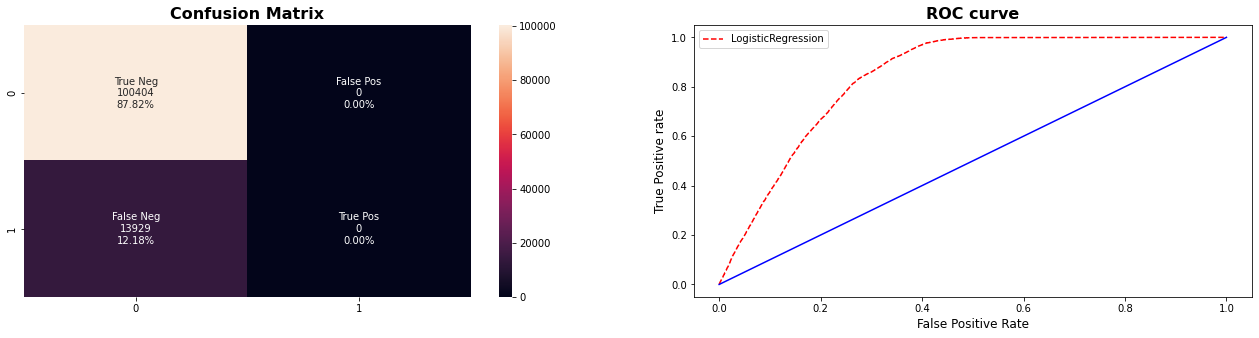

**************************************************
Best Score for LogisticRegression : 0.8918137763932157 
---
Best Parameters for LogisticRegression : {'solver': 'sag', 'random_state': 2, 'penalty': 'l2', 'C': 0.001}
--------------------------------------------------
Elapsed Time: 00:00:07

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



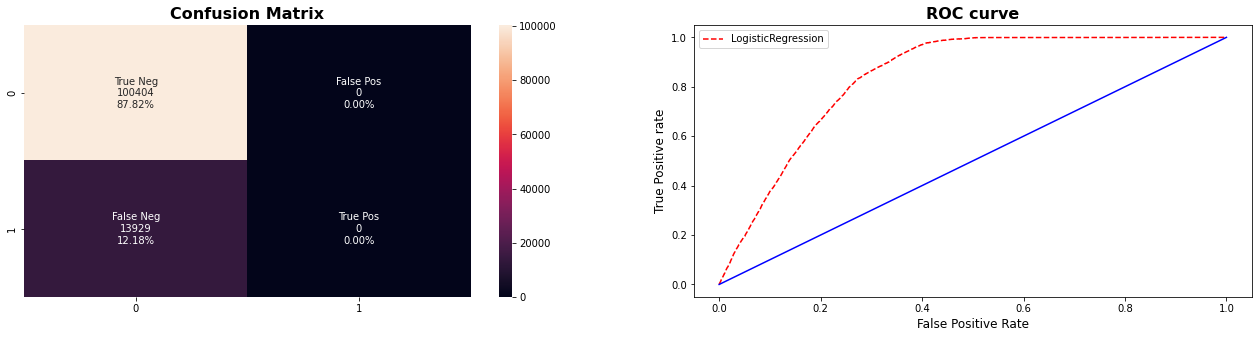

In [ ]:
parameters_lr = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}

run_ml_algorithm(data_df, LogisticRegression(), parameters_lr, Tuning_Method, False)

#Gaussian Naive Bayes : 
Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality.



***Hyper-Parameter Tuning:***

var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GaussianNB
--------------------------------------------------

Evaluation of GaussianNB before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.687571   0.268878  0.910044   0.41511       0.783375  10.791173



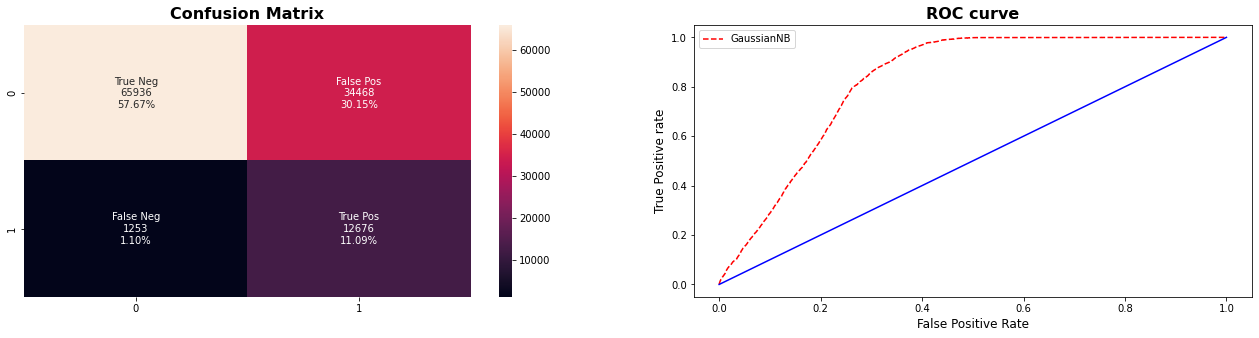

**************************************************
Best Score for GaussianNB : 0.6936647173489279 
---
Best Parameters for GaussianNB : {'var_smoothing': 0.01519911082952933}
--------------------------------------------------
Elapsed Time: 00:00:10

Evaluation of GaussianNB after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score   Log_Loss
0        0.688305   0.269123  0.908321  0.415221       0.783052  10.765797



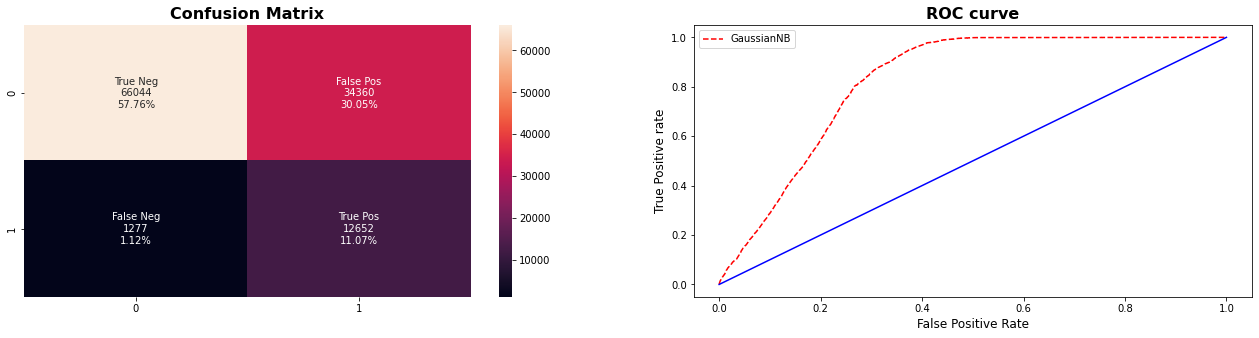

In [ ]:
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

run_ml_algorithm(data_df, GaussianNB(), parameters_NB, Tuning_Method, False)

##**Decision Tree**

> Decision tree is the most powerful and popular tool for classification and prediction.



###Hyper-Parameter Tuning:
**splitter**: strategy used to split the node.


**max_depth**: maximum depth of tree.


**max_samples_leaf**: minimum number of samples required to be at a leaf node.


**min_weight_fraction_leaf**: minimum weighted fraction of the sum total of weights required to be a leaf node


**max_features**: number of features to observe when looking for the best split


**max_leaf_nodes**: grow a tree with max_leaf_nodes in best-first fashion.



**random_state**: Controls the randomness of the estimator.



################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.824556   0.276603  0.272453  0.274513       0.586801  6.059679



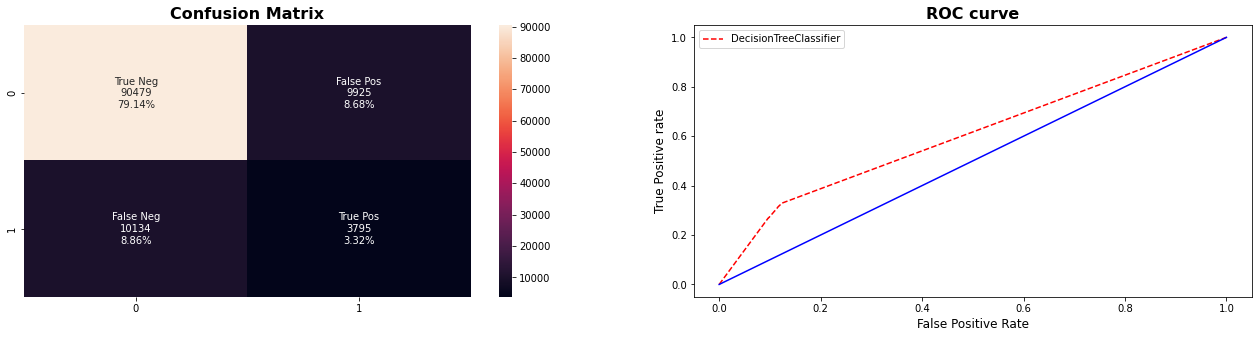

**************************************************
Best Score for DecisionTreeClassifier : 0.8780181580578755 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.3, 'min_samples_leaf': 3, 'max_leaf_nodes': 40, 'max_features': None, 'max_depth': 5}
--------------------------------------------------
Elapsed Time: 00:03:30

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



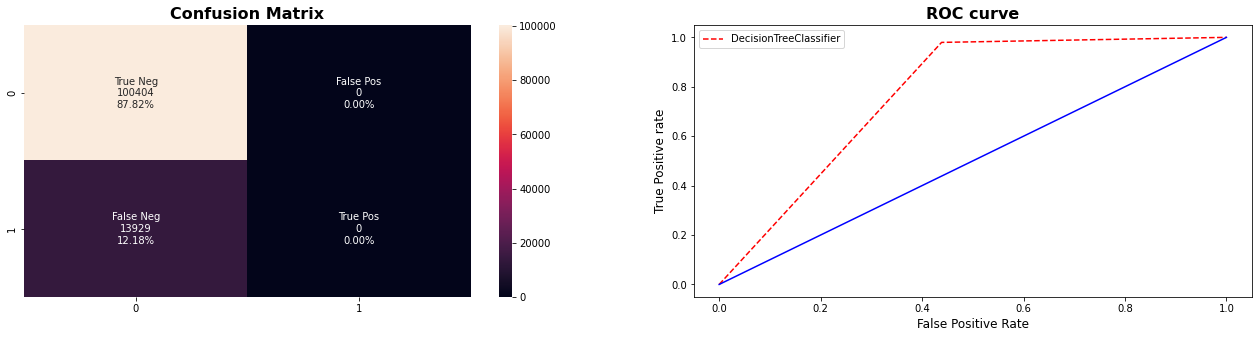

In [ ]:
parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

run_ml_algorithm(data_df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)

##**Gradient Boosting:** 
---
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.


##**Hyper-Parameter Tuning:**
> **max_depth :** The maximum depth of the individual regression estimators

> **n_estimators :** The number of boosting stages to perform. 

> **learning_rate:** Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. 

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GradientBoostingClassifier
--------------------------------------------------

Evaluation of GradientBoostingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878242   0.666667  0.001149  0.002293       0.500535  4.205385



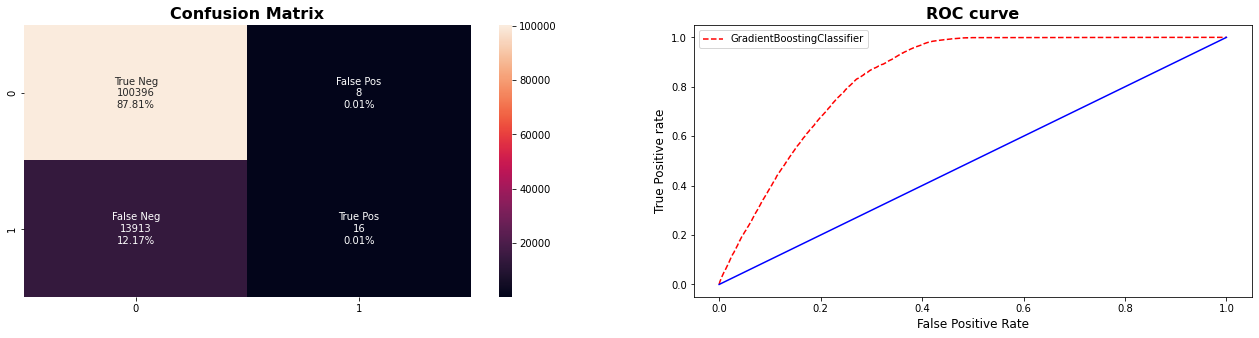

**************************************************
Best Score for GradientBoostingClassifier : 0.8750009555479112 
---
Best Parameters for GradientBoostingClassifier : {'n_estimators': 60, 'max_depth': 3, 'learning_rate': 0.01}
--------------------------------------------------
Elapsed Time: 00:01:01

Evaluation of GradientBoostingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.878172        0.0     0.0       0.0            0.5  4.207802



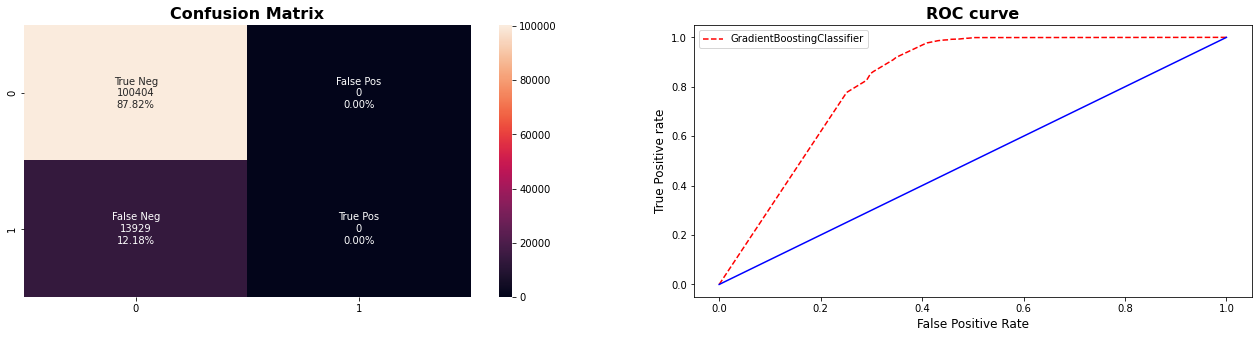

In [ ]:
parameters_xgboost = {"max_depth" : range(2,10,1),
                      "n_estimators": range(60,220,40),
                      "learning_rate" : [0.1,0.01,0.05]}

run_ml_algorithm(data_df, GradientBoostingClassifier(),parameters_xgboost, Tuning_Method, False)

##**Bagging Classifier**
---
A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions to form a final prediction.


###***Hyper-Parameter Tuning:***
> n_estimators: The Maximum number of estimators at which boosting is terminated.
> random_state: Controls the randomness of the estimator.

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
BaggingClassifier
--------------------------------------------------

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.853481   0.301505  0.153923  0.203802       0.552227  5.060635



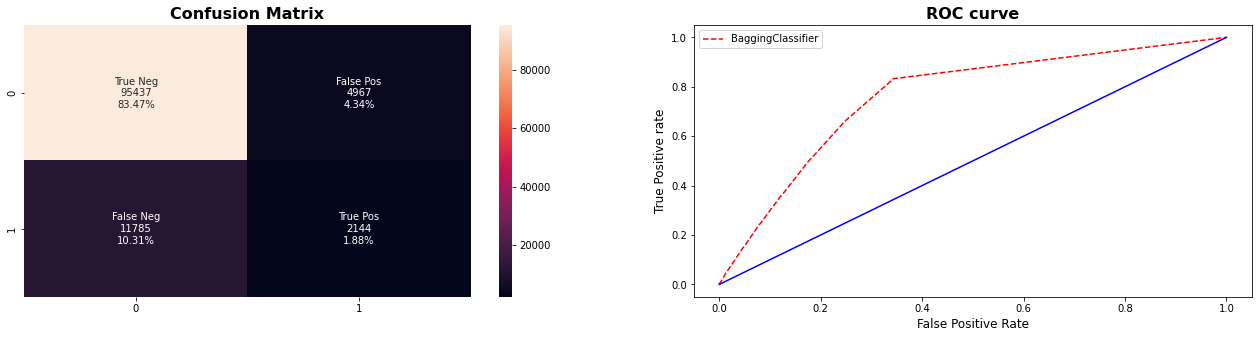

**************************************************
Best Score for BaggingClassifier : 0.8212121212121213 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:04:06

Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.855737   0.312637  0.153636  0.206027       0.553388  4.982694



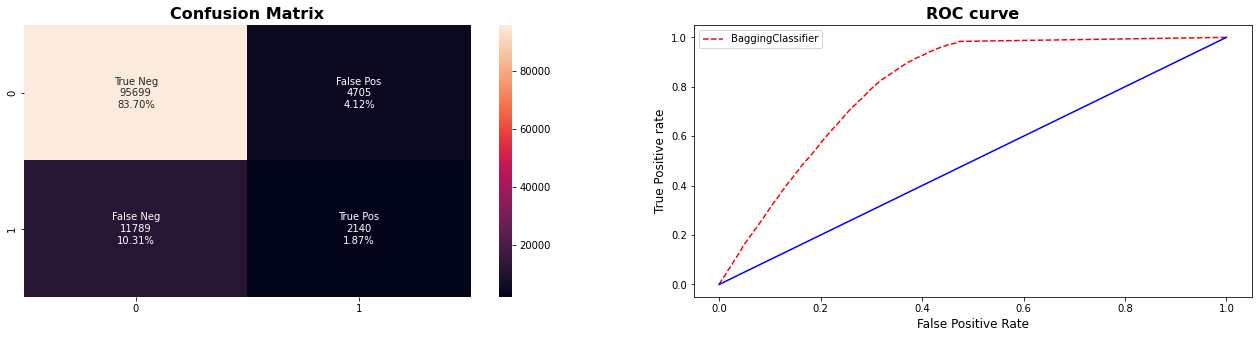

In [ ]:
parameters_bagging = {'n_estimators': [10,100,200],
                      'random_state': [26]}

run_ml_algorithm(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False)

#**Insight gained:**

---
From all the above models that we tried to train and predict the output, we can conclude that ***Bagging Classifier*** is the best model for our data set.

The best parameter of this model is {'n_estimators': 200}. Its Accuracy Score is 0.85, Precision is 0.31, Recall is 0.15, F1_Score is 0.20, ROC_AUC_Score is 0.55 and Log_Loss is 4.98. Its Elapsed time  is 03:46


We can see that we have other models with higher Accuracy Score than Bagging Classifier. But the problem with those models is, their Precision and Recall values are zero which means True Positives are zero. That means those models are unable to predict correct output if any customer is ready to take vehicle insurance. And as we all know, classification accuracy alone can be misleading if you have an unequal number of observations in each class. This is exactly the case with our data set.

Hence, Bagging Classifier is the best model for our data set.

Also you might get a slight difference in result every time you run because we are using Halving_Randomized_Search_CV to perform hyperparameter tunning which randomly selects the combination of parameters to tune the model.




#Extracting Feature Importance
---
As we have our best performing model with it's hyperparameters, let's have a look on important featuers on our dataset


In [ ]:
def feature_plot(importances, X_train, y_train):
    
  # Display the five most important features
  indices = np.argsort(importances)[::-1]
  columns = X_train.columns.values[indices[:5]]
  values = importances[indices][:5]

  # Creat the plot
  fig = plt.figure(figsize = (9,5))
  plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
  plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000',label = "Feature Weight")
  plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', label = "Cumulative Feature Weight")
  plt.xticks(np.arange(5), columns)
  plt.xlim((-0.5, 4.5))
  plt.ylabel("Weight", fontsize = 12)
  plt.xlabel("Feature", fontsize = 12)
    
  plt.legend(loc = 'upper center')
  plt.tight_layout()
  plt.show()

def show_feature_importance():
  x_train, y_train, model = run_ml_algorithm(data_df, BaggingClassifier(n_estimators=200, random_state=23),None, None, True)
    
  importances = np.mean([tree.feature_importances_ for tree in model.estimators_], axis=0)
  feature_plot(importances, x_train, y_train)

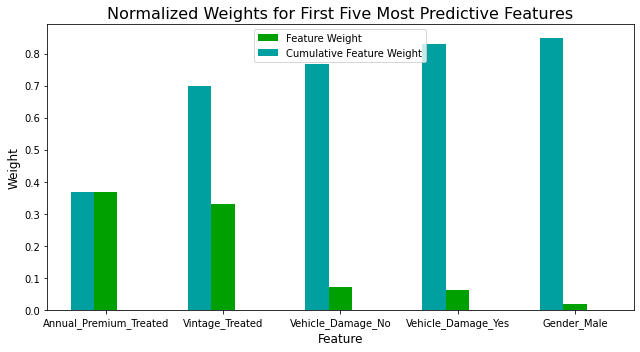

In [ ]:
show_feature_importance()

##Insights Obtained: 

Annual Premium Treated Feature has impacted the most in the prediction.

Gender_Male has highest feature weight but less cumulative weight.

#**Conclusion**
---

Reaching to the end of our project, concluding some meaningful insights for further future deployment, Concluding in a chronological order:

Getting started from loading the dataset, our team firstly went through the dataset for any duplicate or null Values.

Fetching the insights of no null values and duplicate values, there was no need to treatment required so far.

Moving to the Data Processing, earlier we applied feature scalling techniques to normalize our data to bring all features on the same scale and make it simpler to run machine learning algorithms.

In our **Exploratory Data Analysis** section , we mostly categorized Age feature as young_age, middle_age, and oldage and Region_Code as Region_A, Region_B, Region_C. We also categorized the Policy_Sales_Channel into channel_A, channel_B, channel_C. 

Our EDA gave us the results that customers belonging to the **young_age are more interested in vehicle Response** whereas **customers having a vehicle for more than 2 years are more likely to be interested in vehicle insurance.** Similarly, **Customers owning damaged vehicles were also more inclined towards vehicle insurance**



Moreover, we used Kendall's rank correlation coefficient for numerical features and for categorical features also there is no correlation between the numeric features

After all Preprocessing, We finally started with **Machine Learning Algorithms** to determine if a customer would be interested in purchasing the vehicle insurance. For **Gausian Naive Bayes** classifier algorithm, we got an accuracy score of 68%, for Decision Tree, Gradient Boosting and Bagging Classifier accuracy score obtained arround 82-87%, So, we selected our best model **Bagging Classifier**  as the model with an accuracy score of **85%** considering precision and recall as we have an unequal number of observations in each class in our dataset, so accuracy alone can be misleading.
